In [44]:
from keras.models import Sequential
from keras.layers import Dense, Activation,LeakyReLU, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
# Read the data
# 1- Simulated Time Series
dataset = pd.read_csv('Simulated_Data.csv', index_col=[0])

# 2- Beijing PM2.5 Data Data Set 
# 2.1- Hourly data
#dataset = pd.read_csv('Beijing_hourly.csv', index_col=['date'])

# 2.2- Daily resampled data
#dataset = pd.read_csv('Beijing_daily.csv')

dataset = dataset.values

In [51]:
idx_interest_var = 0 # gives the column index of the series in the data {0, 1, 2,..., n_feature-1}
data = dataset[:,idx_interest_var] # choose the time sereis of interest from data
n_input = 20
n_out = 7
#skip = 20

def split_dataset(data): # data is np.array of size T*n_features=1
    T = data.shape[0]
    split_ratio = 0.7
    t_split = np.int(np.floor(split_ratio * T))
    # split into train and test
    train, test = data[0: t_split], data[t_split:]
    return train, test

# convert data (train or test) into inputs (X) and outputs (y)
def to_supervised(data, n_input, n_out):
    # X and y have shapes of (#samples, n_input) and (#samples, n_out) repectively.
    
    X = []
    y = []
    T_tr = data.shape[0]
    
    for i in range(T_tr - n_input - n_out + 1):
        X.append(data[i: i + n_input])
        y.append(data[i + n_input: i + n_input + n_out])
    X = np.array(X)
    y = np.array(y)  
    return X, y



def build_model(train, n_input, n_out):
    # prepare data
    train_x, train_y = to_supervised(train, n_input, n_out)
    # create model
    model = Sequential()
    model.add(BatchNormalization())

    model.add(Dense(100, input_dim= n_input))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())

    
    model.add(Dense(n_out,))
    model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mse'])
    # Fit the model
    model.fit(train_x, train_y, epochs=100, batch_size=20)
    
    return model, train_x, train_y

def evaluate(test, n_input, n_out, model):
    # prepare data
    test_x, test_y = to_supervised(test, n_input, n_out)
    y_hat = model.predict(test_x)
    n = y_hat.shape[0] 
    prediction_error = y_hat - test_y
    mse = np.sum(prediction_error**2, axis=0)/n   
    score = np.mean(mse)
    return mse, score, test_x, test_y, y_hat

In [52]:
train, test = split_dataset(data) 
m, train_x, train_y = build_model(train, n_input, n_out)
mse, score, test_x, test_y, y_hat = evaluate(data, n_input, n_out, m)

Epoch 1/100
674/674 [==============================] - 4s 6ms/step - loss: 23.8079 - mean_squared_error: 23.8079
Epoch 2/100
674/674 [==============================] - 0s 558us/step - loss: 19.0671 - mean_squared_error: 19.0671
Epoch 3/100
674/674 [==============================] - 0s 393us/step - loss: 15.6899 - mean_squared_error: 15.6899
Epoch 4/100
674/674 [==============================] - 0s 309us/step - loss: 11.9057 - mean_squared_error: 11.9057
Epoch 5/100
674/674 [==============================] - 0s 364us/step - loss: 8.2203 - mean_squared_error: 8.2203
Epoch 6/100
674/674 [==============================] - 0s 380us/step - loss: 5.5225 - mean_squared_error: 5.5225
Epoch 7/100
674/674 [==============================] - 0s 355us/step - loss: 3.3572 - mean_squared_error: 3.3572
Epoch 8/100
674/674 [==============================] - 0s 274us/step - loss: 2.3974 - mean_squared_error: 2.3974
Epoch 9/100
674/674 [==============================] - 0s 394us/step - loss: 2.3562 - mean

674/674 [==============================] - 0s 294us/step - loss: 1.9919 - mean_squared_error: 1.9919
Epoch 73/100
674/674 [==============================] - 0s 315us/step - loss: 2.0045 - mean_squared_error: 2.0045
Epoch 74/100
674/674 [==============================] - 0s 372us/step - loss: 1.8341 - mean_squared_error: 1.8341
Epoch 75/100
674/674 [==============================] - 0s 472us/step - loss: 1.9122 - mean_squared_error: 1.91220s - loss: 2.1447 - mean_squared_error: 
Epoch 76/100
674/674 [==============================] - 0s 277us/step - loss: 1.9652 - mean_squared_error: 1.9652
Epoch 77/100
674/674 [==============================] - 0s 303us/step - loss: 1.9273 - mean_squared_error: 1.9273
Epoch 78/100
674/674 [==============================] - 0s 304us/step - loss: 1.8433 - mean_squared_error: 1.8433
Epoch 79/100
674/674 [==============================] - 0s 228us/step - loss: 2.0747 - mean_squared_error: 2.0747
Epoch 80/100
674/674 [==============================] - 0s 30

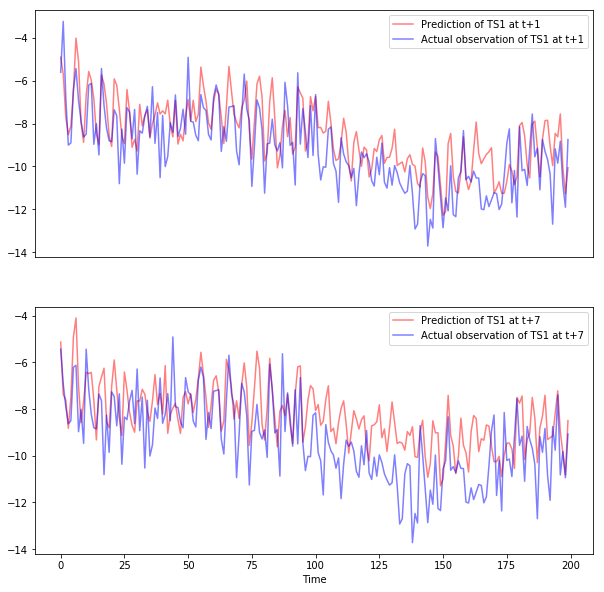

In [58]:

f, (a0, a1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]}, figsize=(10, 10))
a0.plot(y_hat[-200:, 0], 'r', test_y[-200:, 0], 'b',alpha = 0.5)
a0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a0.legend(['Prediction of TS1 at t+1', 'Actual observation of TS1 at t+1' ])



a1.plot(y_hat[-200:, 6], 'r', test_y[-200:, 6], 'b',alpha = 0.5)
a1.legend(['Prediction of TS1 at t+7', 'Actual observation of TS1 at t+7' ])
a1.set_xlabel('Time');
plt.savefig(r'C:\Users\Javad\Dropbox\McGill ECON MA and PhD\2018\9- Fall 2018\1- ECON 706- Machine Learning\Project\Pics\Multistep_predict_FF_TS1')



In [54]:
mse, score

(array([1.12134965, 1.08624726, 1.20277652, 1.3764564 , 1.33976964,
        1.72485736, 1.78880735]), 1.3771805973412332)